In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import DotProduct

digits = datasets.load_digits()


seed = 42
np.random.seed(seed)
# Load data into train set and test set
digits = datasets.load_digits()
X = digits.data
y = np.array(digits.target, dtype = int)
X,y = shuffle(X,y)
N,d = X.shape
Ntest = int(100)
Ntrain = int(1697)
Xtrain = X[0:Ntrain,:]
ytrain = y[0:Ntrain]
Xtest = X[Ntrain:N,:]
ytest = y[Ntrain:N]


In [2]:
def multiClassHingeLoss(Theta, x, y):
    margins = [] 
    numOfClasses = Theta.shape[1]
    for j in range(numOfClasses):
        score = np.dot(x, (Theta[:,j]- Theta[:,y]))
        margins.append(1 + score)
            
    return np.max(margins), margins


In [3]:
def svmsubgradient(Theta, x, y):
    G = np.zeros(Theta.shape)
    
    hingeLoss, margins = multiClassHingeLoss(Theta, x, y)
    numOfClasses = Theta.shape[1]
    if hingeLoss != 0:
        for j in range(numOfClasses):
            if j != y:
                if margins[j] > 0:
                    G[:, j] += x
                    G[:, y] -= x
    return G, hingeLoss


In [4]:

def sgd(Xtrain, ytrain, maxiter = 10, init_stepsize = 1.0, l2_radius = 10000):
    K = 10
    NN, dd = Xtrain.shape
    print(NN)
    Theta = np.zeros((dd, K))
    mean_Theta = np.zeros((dd, K))
    
    stepsize = init_stepsize/math.sqrt(K)
    size_Dataset = Xtrain.shape[0]
    loss_history = []
    for i in range(maxiter):
        random_sample = random.randint(0, size_Dataset-1)
        subGradient, loss = svmsubgradient(Theta, Xtrain[random_sample], ytrain[random_sample])
        Theta -= stepsize*subGradient

        frobenius_norm = np.linalg.norm(Theta, ord='fro')
        if frobenius_norm >= l2_radius:
            Theta = (l2_radius/frobenius_norm)*Theta
        
        mean_Theta = (mean_Theta*i + Theta) / (i + 1)
        loss_history.append(loss)
 
    return Theta, mean_Theta, loss_history


In [5]:
def Classify(Xdata, Theta):
    scores = np.matmul(Xdata, Theta)
    inds = np.argmax(scores, axis = 1)
    return(inds)

In [6]:
l2_radius = 40.0
M_raw = np.sqrt(np.mean(np.sum(np.square(Xtrain))))
init_stepsize = l2_radius/M_raw
# maxiter = 40000
maxiter = 40000
Theta, mean_Theta, loss_history = sgd(Xtrain, ytrain, maxiter, init_stepsize, l2_radius)


1697


In [7]:
print('Error rate')
print(np.sum(np.not_equal(Classify(Xtest, mean_Theta),ytest)/Ntest))

Error rate
0.01


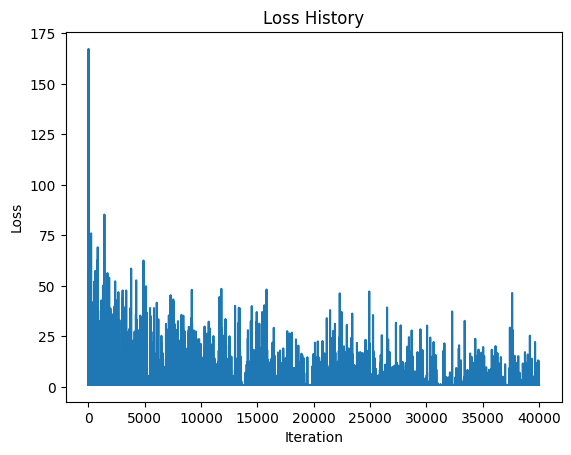

In [8]:
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

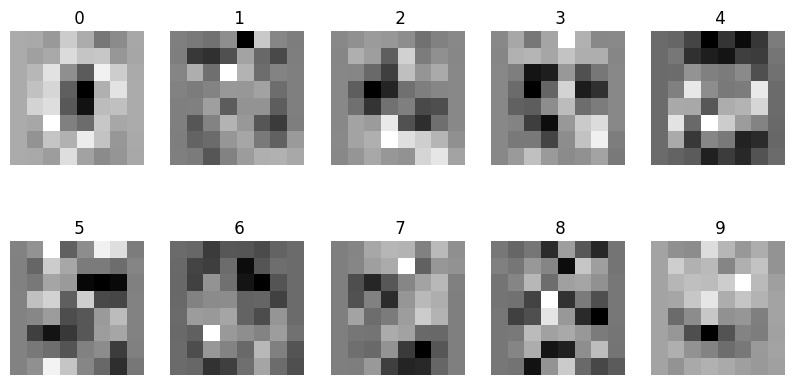

In [9]:
num_classes = Theta.shape[1]

plt.figure(figsize=(10, 5))
for i in range(num_classes):
    plt.subplot(2, 5, i + 1)
    plt.imshow(Theta[:, i].reshape(8, 8), cmap='gray')
    plt.title(f' {i}')
    plt.axis('off')

In [10]:
## Evaluations of different training sizes.

train_size = [20, 50, 100, 500, 1000, 1500]
for size in train_size:   

    Ntrain = size
    Ntest = 1797-Ntrain
    Xtrain = X[0:Ntrain,:]
    ytrain = y[0:Ntrain]
    Xtest = X[Ntrain:N,:]
    ytest = y[Ntrain:N]

    Theta, mean_Theta, loss_history = sgd(Xtrain, ytrain, maxiter, init_stepsize, l2_radius)
    print('Error rate')
    print(np.sum(np.not_equal(Classify(Xtest, mean_Theta),ytest)/Ntest))
    num_classes = Theta.shape[1]
    # plt.figure(figsize=(10, 5))
    # for i in range(num_classes):
    #     plt.subplot(2, 5, i + 1)
    #     plt.imshow(Theta[:, i].reshape(8, 8), cmap='gray')
    #     plt.title(f' {i}')
    #     plt.axis('off')




20
Error rate
0.3635340461451886
50
Error rate
0.21694333142530048
100
Error rate
0.15439010017678256
500
Error rate
0.05782575173477255
1000
Error rate
0.0451693851944793
1500
Error rate
0.06060606060606061


In [11]:
learning_rates = [1, 1/2, 1/4, 1/8, 1/16]
for learning_rate in learning_rates:   

    Ntrain = 1697
    Xtrain = X[0:Ntrain,:]
    ytrain = y[0:Ntrain]
    Xtest = X[Ntrain:N,:]
    ytest = y[Ntrain:N]

    Theta, mean_Theta, loss_history = sgd(Xtrain, ytrain, maxiter, learning_rate, l2_radius)
    print('Error rate')
    print(np.sum(np.not_equal(Classify(Xtest, mean_Theta),ytest)/Ntest))
    num_classes = Theta.shape[1]

1697
Error rate
0.07
1697
Error rate
0.09
1697
Error rate
0.07
1697
Error rate
0.02
1697
Error rate
0.01
